In [21]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sb
!pip install yfinance

import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web

from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()

In [22]:
#Load tickers variable for amazon

tickers = 'AMZN'

In [26]:
start_date = '2022-1-18'

In [27]:
tickers = 'AMZN'
mydata = pdr.get_data_yahoo(tickers, start = start_date)['Close']
mydata

[*********************100%***********************]  1 of 1 completed


Date
2022-01-18 00:00:00-05:00    158.917496
2022-01-19 00:00:00-05:00    156.298996
2022-01-20 00:00:00-05:00    151.667496
2022-01-21 00:00:00-05:00    142.643005
2022-01-24 00:00:00-05:00    144.544006
                                ...    
2023-03-15 00:00:00-04:00     96.199997
2023-03-16 00:00:00-04:00    100.040001
2023-03-17 00:00:00-04:00     98.949997
2023-03-20 00:00:00-04:00     97.709999
2023-03-21 00:00:00-04:00    100.610001
Name: Close, Length: 295, dtype: float64

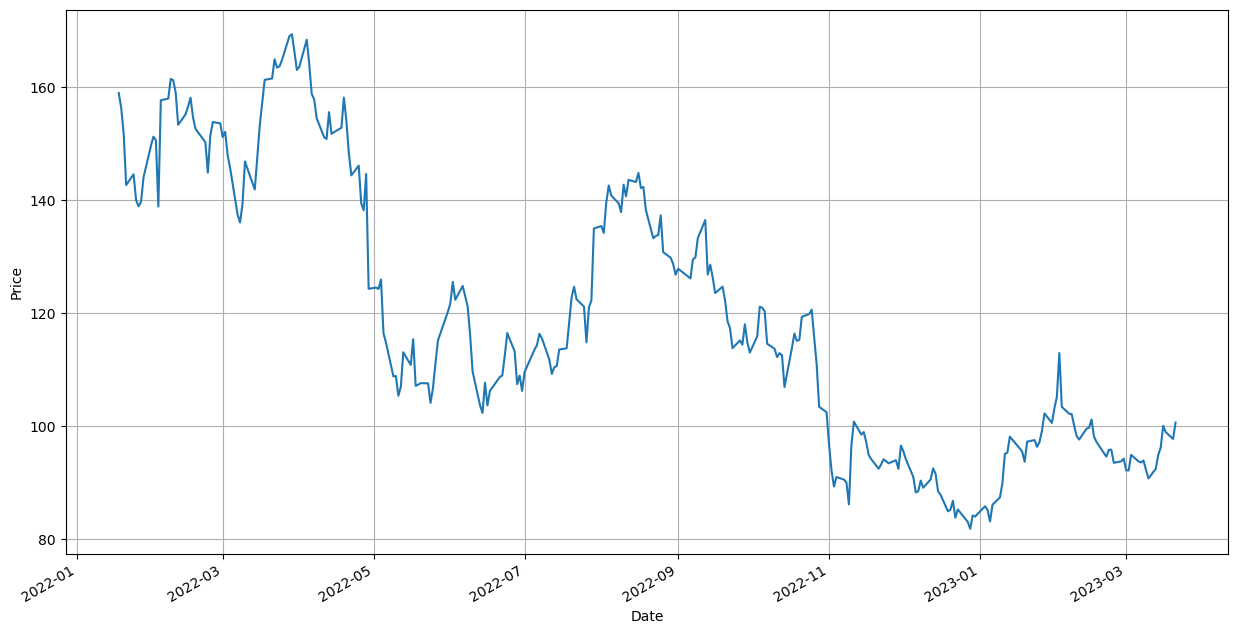

In [28]:
mydata.plot(figsize = (15, 8))
plt.grid()
plt.ylabel('Price')
plt.show()

In [31]:
df = pd.DataFrame(mydata)
df

,Close
Date,
2022-01-18 00:00:00-05:00,158.917496
2022-01-19 00:00:00-05:00,156.298996
2022-01-20 00:00:00-05:00,151.667496
2022-01-21 00:00:00-05:00,142.643005
2022-01-24 00:00:00-05:00,144.544006
...,...
2023-03-15 00:00:00-04:00,96.199997
2023-03-16 00:00:00-04:00,100.040001
2023-03-17 00:00:00-04:00,98.949997


In [32]:
df['EMA20'] = df['Close'].ewm(span = 20, adjust = False).mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 295 entries, 2022-01-18 00:00:00-05:00 to 2023-03-21 00:00:00-04:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   295 non-null    float64
 1   EMA20   295 non-null    float64
dtypes: float64(2)
memory usage: 15.0 KB


In [33]:
df['EMA50'] = df['Close'].ewm(span = 50, adjust = False).mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 295 entries, 2022-01-18 00:00:00-05:00 to 2023-03-21 00:00:00-04:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   295 non-null    float64
 1   EMA20   295 non-null    float64
 2   EMA50   295 non-null    float64
dtypes: float64(3)
memory usage: 17.3 KB


In [34]:
df['Signal'] = 0.0  
df['Signal'] = np.where(df['EMA20'] > df['EMA50'], 1.0, 0.0)

In [35]:
df['Position'] = df['Signal'].diff()

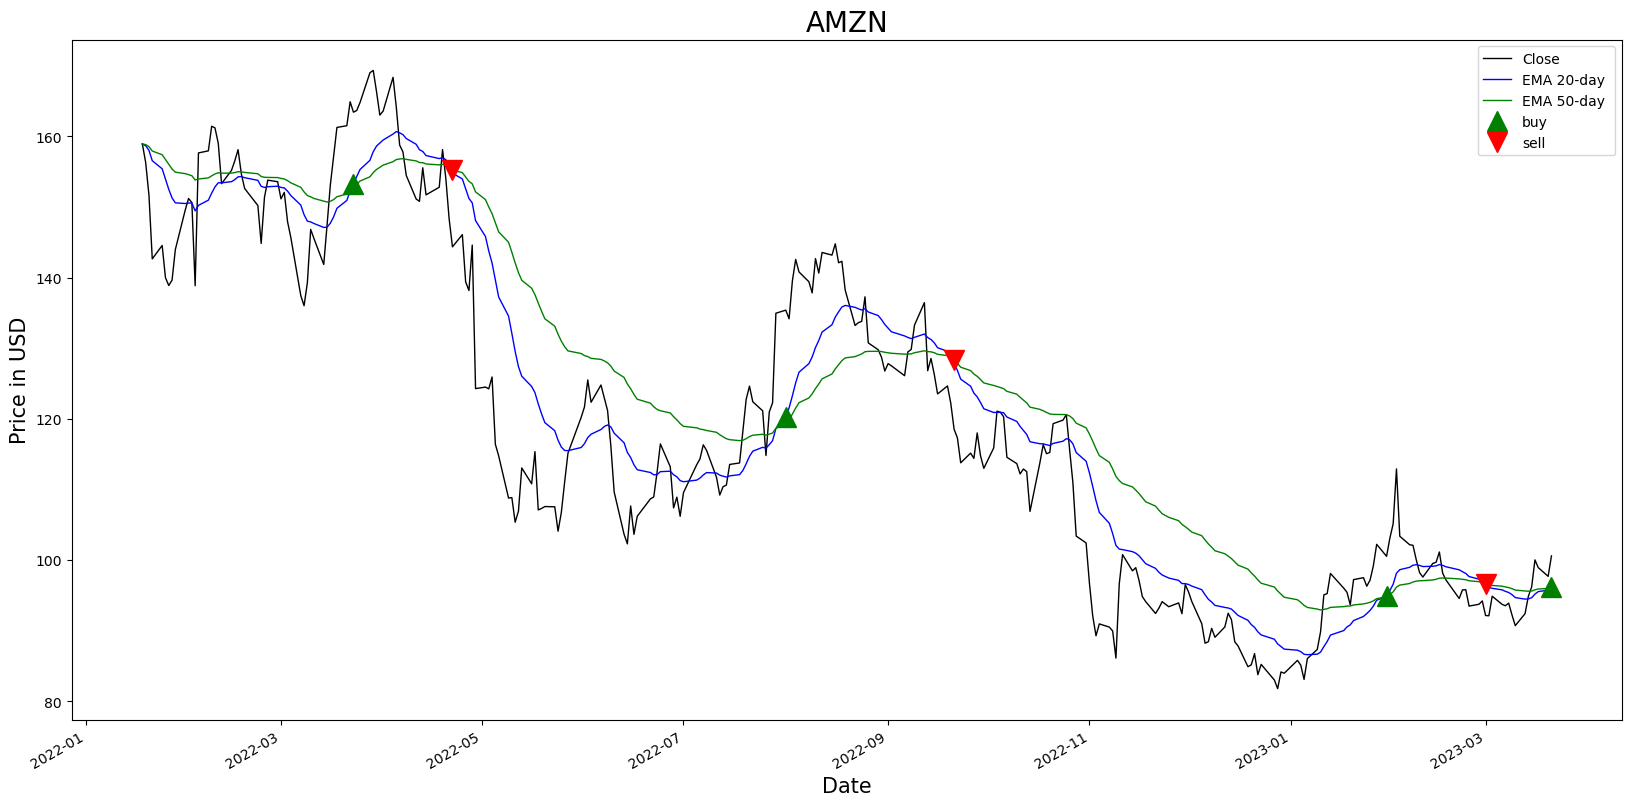

<Figure size 640x480 with 0 Axes>

In [36]:
plt.figure(figsize = (20, 10))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', lw = 1, label = 'Close')  
df['EMA20'].plot(color = 'b', lw = 1, label = 'EMA 20-day ') 
df['EMA50'].plot(color = 'g', lw = 1, label = 'EMA 50-day ')
# plot ‘buy’ and 'sell' signals
plt.plot(df[df['Position'] == 1].index, 
         df['EMA20'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(df[df['Position'] == -1].index, 
         df['EMA50'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('AMZN' , fontsize = 20)
plt.legend()
plt.figure()
plt.show()

In [37]:
df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------------+---------+----------+----------+----------+------------+
| Date                      |   Close |    EMA20 |    EMA50 |   Signal | Position   |
|---------------------------+---------+----------+----------+----------+------------|
| 2022-03-23 00:00:00-04:00 | 163.408 | 153.313  | 152.781  |        1 | Buy        |
| 2022-04-22 00:00:00-04:00 | 144.35  | 154.783  | 155.21   |        0 | Sell       |
| 2022-08-01 00:00:00-04:00 | 135.39  | 120.228  | 119.325  |        1 | Buy        |
| 2022-09-21 00:00:00-04:00 | 118.54  | 127.873  | 128.295  |        0 | Sell       |
| 2023-01-30 00:00:00-05:00 | 100.55  |  94.922  |  94.7905 |        1 | Buy        |
| 2023-03-01 00:00:00-05:00 |  92.17  |  96.5558 |  96.6653 |        0 | Sell       |
| 2023-03-21 00:00:00-04:00 | 100.61  |  96.221  |  96.1751 |        1 | Buy        |
+---------------------------+---------+----------+----------+----------+------------+
